# CNN Model TensorFlow

In this notebook we will: 
* visualize MRI images
* preprocess our data
* experiment with CNNs

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("test_dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
import os
#walk through our data directory using the os.walk
your_data_path = "test_dataset"
for dirpath, dirnames, filenames in os.walk(your_data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

There are 2 directories and 0 images in 'test_dataset' .
There are 2 directories and 0 images in 'test_dataset/train' .
There are 0 directories and 826 images in 'test_dataset/train/yes' .
There are 0 directories and 395 images in 'test_dataset/train/no' .
There are 2 directories and 0 images in 'test_dataset/test' .
There are 0 directories and 100 images in 'test_dataset/test/yes' .
There are 0 directories and 105 images in 'test_dataset/test/no' .


## Data Preprocessing
### Let's create a function that plots random images of our dataset

In [4]:
#Lets visualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    #setuop target directory
    target_folder = target_dir + target_class

    #get random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    #read tha image and plot it
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)
Image shape: (750, 750, 3)


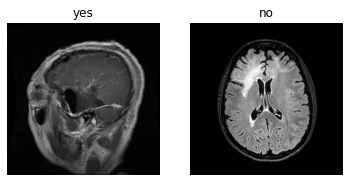

In [5]:

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image( your_data_path+ "/train/", "yes")
plt.subplot(1,2,2)
pizza_img = view_random_image( your_data_path + "/train/", "no")

We can see that is not always so easy to distinguish which is the positive and negative class. 

### Build a CNN same a Tiny VGG on CNN explainer

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

#normalizing the data

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

#setup paths to data directories
train_dir = your_data_path + "/train"
test_dir =  your_data_path + "/test"

#import data from dirs and turn them into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed=42)

Found 1221 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [8]:
#Build a CNN (like Tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters =10,
                          kernel_size =3,
                          activation = "relu",
                          input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),#these 2 layers are the same
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding = 'valid'),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

#Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch =len(train_data),
                        validation_data = valid_data,
                        validation_steps =len(valid_data))

Epoch 1/5
39/39 [==============================] - 17s 150ms/step - loss: 0.4638 - accuracy: 0.8018 - val_loss: 1.6235 - val_accuracy: 0.5415
Epoch 2/5
39/39 [==============================] - 6s 142ms/step - loss: 0.1940 - accuracy: 0.9271 - val_loss: 2.2521 - val_accuracy: 0.5756
Epoch 3/5
39/39 [==============================] - 6s 145ms/step - loss: 0.0864 - accuracy: 0.9762 - val_loss: 2.6796 - val_accuracy: 0.6049
Epoch 4/5
39/39 [==============================] - 6s 145ms/step - loss: 0.0544 - accuracy: 0.9812 - val_loss: 4.9024 - val_accuracy: 0.6049
Epoch 5/5
39/39 [==============================] - 6s 145ms/step - loss: 0.0341 - accuracy: 0.9910 - val_loss: 5.5963 - val_accuracy: 0.6000


As we can see the model is overfitting. We need to understand why this is happening and how to make our models predictions more accurate.

In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    